In [54]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage.draw import line
import random

%matplotlib inline

In [2]:
# # load dem
# filename = "brooklyn10m.dem"
# demdata = gdal.Open(filename)
# demarray = np.array(demdata.GetRasterBand(1).ReadAsArray())
# print("shape", demarray.shape)
# print("min", demarray.min(), "\nmax", demarray.max())

In [3]:
# plt.hist(demarray.flatten())
# plt.show()

In [4]:
# fig = plt.figure(figsize=(15, 15))

# ax = fig.add_subplot(111)
# ax.set_title('colorMap')
# plt.imshow(demarray)
# ax.set_aspect('equal')

# cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
# cax.get_xaxis().set_visible(False)
# cax.get_yaxis().set_visible(False)
# cax.patch.set_alpha(0)
# cax.set_frame_on(False)
# plt.colorbar(orientation='vertical', ax=ax)
# plt.show()

In [5]:
# #################################
# # correct min elevation
# #################################
# min_elevation = -1

# i2 = np.where(demarray < min_elevation)
# demarray = demarray.copy()
# demarray[i2] = min_elevation
# print(demarray.min(), demarray.max())

In [6]:
# plt.hist(demarray.flatten())
# plt.show()

In [7]:
# fig = plt.figure(figsize=(15, 15))

# ax = fig.add_subplot(111)
# ax.set_title('colorMap')
# plt.imshow(demarray)
# ax.set_aspect('equal')

# cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
# cax.get_xaxis().set_visible(False)
# cax.get_yaxis().set_visible(False)
# cax.patch.set_alpha(0)
# cax.set_frame_on(False)
# plt.colorbar(orientation='vertical', ax=ax)
# plt.show()

In [8]:
# ####################
# # CLEAN UP EDGES
# ####################

# # make copy of dem to edit
# dem2 = demarray.copy()

# # go through image
# for row in range(demarray.shape[0]):
#     if row%100==0:
#         print(row, '/', demarray.shape[0])
#     for col in range(demarray.shape[1]):
#         #if col%100==0:
#         #    print(col)
#         # if pixel value is < 0, set it to closest non-negative pixel value (take average value if more than 1)
#         if demarray[row, col] < 0:
#             fixed = False
#             dist = 1
#             while not fixed:
#                 # get min/max rows/cols for values dist from the pixel
#                 minrow = row-dist
#                 if minrow < 0:
#                     minrow = 0
#                 maxrow = row+dist
#                 if maxrow > demarray.shape[0]:
#                     maxrow = demarray.shape[0]
#                 mincol = col-dist
#                 if mincol < 0:
#                     mincol = 0
#                 maxcol = col+dist
#                 if maxcol >= demarray.shape[1]:
#                     maxcol = demarray.shape[1]
                
#                 # get matrix of size dist around the pixel
#                 m = demarray[minrow:maxrow, mincol:maxcol]
                
#                 # find all non-negative values in the matrix m
#                 nonnegs = []
#                 for mrow in range(m.shape[0]):
#                     for mcol in range(m.shape[1]):
#                         if m[mrow, mcol] >= 0:
#                             nonnegs.append(m[mrow, mcol])
#                 # if nonnegs, get average and set value to it
#                 if len(nonnegs):
#                     avg = np.mean(nonnegs)
#                     dem2[row, col] = round(avg, 1)
#                     fixed = True
#                 # if no nonnegs, increase distance and continue
#                 else:
#                     dist += 1

In [9]:
# # save the fixed dem so we don't have to process it again
# savefile = "brooklyn10mfixed.npy"
# np.save(savefile, dem2)

In [10]:
# load the fixed dem
savefile = "brooklyn10mfixed.npy"
dem2 = np.load(savefile)

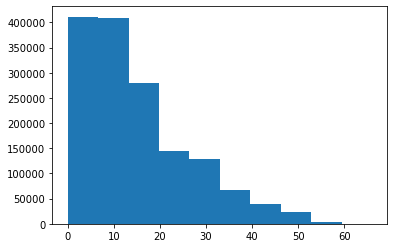

In [11]:
plt.hist(dem2.flatten())
plt.show()

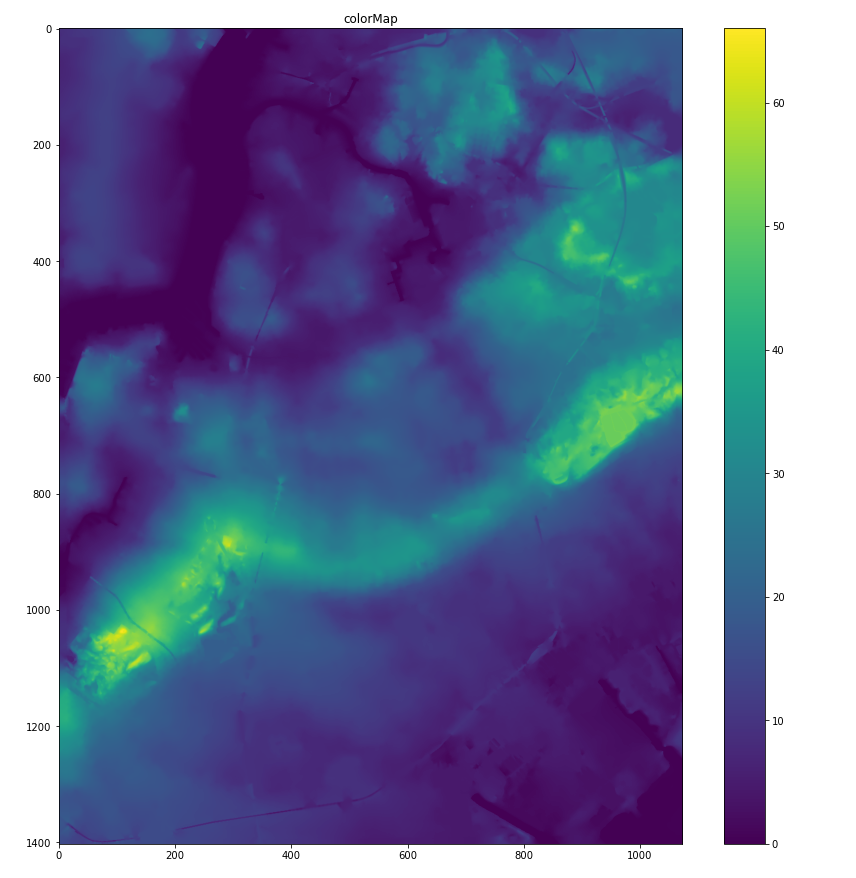

In [12]:
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(dem2)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical', ax=ax)
plt.show()

In [13]:
# # try horizon to right of middle pixel value
# start = [700, 500]
# # NOTE: we have to add 2 below because it can find sharp angles with just small differences in the first 10m, 
# #    plus most images are probably taken at eye level, over a meter higher
# start_elev = dem2[start[0], start[1]] + 2
# print('start height', start_elev)
# maxtheta = -np.pi/4 # init to lowest
# peak = ""

# # go through each pixel to the right
# i = 1
# for col in range(start[1]+1, dem2.shape[1]):
#     elev = dem2[start[0], col]
#     #print(elev)
#     # find theta with arctan(opposite/adjacent)
#     # opposite is just elev-start_elev
#     opp = (elev-start_elev)
#     # adjacent length is 10m per pixel, which is 10x height, so multiply col by 10 to match height
#     # NOTE: check if this step is skippable. maybe adj pixel gsd is arbitrary and can skip multiplying by 10
#     adj = (col-start[1])*10
#     newtheta = np.arctan(opp/adj)
#     i+=1
#     if newtheta > maxtheta:
#         maxtheta = newtheta
#         peak = str(opp+start_elev)+" meters and "+str(round(maxtheta*180/np.pi, 4))+" degrees at position "+str([start[0], col])
# print(peak)
# print(i)

In [14]:
# #https://stackoverflow.com/questions/7878398/how-to-extract-an-arbitrary-line-of-values-from-a-numpy-array

# # make a line with "num" points...
# # NOTE: can speed this up by rounding to nearest pixels... a little jagged but probably a lot faster
# x0, y0 = start[1], start[0] # these are in pixel coordinates
# x1, y1 = dem2.shape[1], start[0]
# num = int(np.hypot(x1-x0, y1-y0)) # approx num of pixels from point to edge of image
# x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

# zi = scipy.ndimage.map_coordinates(dem2, np.vstack((y,x)))
# #zi += start_elev - 1.5
# #print(zi+start_elev)

# # start 2m higher to prevent small changes from nearby pixels having the highest thetas
# start_elev = dem2[start[0], start[1]] + 2
# print('start height', start_elev)
# maxtheta = -np.pi/4 # init to lowest
# peak = ""

# # go through each pixel to the right
# for col,elev in enumerate(zi):
#     # skip starting pixel or get divide my zero errors in arctan
#     if col > 0:
#         #print(col,elev)
#         # find theta with arctan(opposite/adjacent)
#         # opposite is just elev-start_elev
#         opp = elev-start_elev
#         # adjacent length is 10m per pixel, which is 10x height, so multiply col by 10 to match height
#         # NOTE: check if this step is skippable. maybe adj pixel gsd is arbitrary and can skip multiplying by 10
#         adj = col*10
#         newtheta = np.arctan(opp/adj)
#         #print(newtheta)
#         if newtheta > maxtheta:
#             maxtheta = newtheta
#             peak = str(opp+start_elev)+" meters and "+str(round(maxtheta*180/np.pi, 4))+" degrees at position "+str([start[0], start[1]+col])
# print(peak)
# print(num)

In [15]:
######################################
# GET HORIZON IN ALL 360 DIRECTIONS
######################################

# TODO: because of earth curvature, lose ~8 inches every mile. subtract this from elevation calculations

start = [600, 600]
horizon_locations = []
horizon_elevations = []
horizon_thetas = []
angle_step_size = 1

# get horizon at every X degrees around our centerpoint
for direction in range(0, int(360/angle_step_size), 1): # use division instead of 3rd range() param for step
                                                        # so we can use fraction step sizes like 0.5 degrees
    direction *= angle_step_size
    if direction%45==0:
        print(direction)
    radians = np.deg2rad(direction)

    # adjust opp and adj depending on quadrant of the angle
    if direction >= 0 and direction < 90:
        adj = dem2.shape[1]-start[1]
        opp = np.tan(radians)*adj
    elif direction > 90 and direction < 180:
        adj = -start[1]
        opp = np.tan(radians)*adj
    elif direction >= 180 and direction < 270:
        adj = -start[1]
        opp = np.tan(radians)*adj
    elif direction > 270: # and direction < 360:
        adj = dem2.shape[1]-start[1]
        opp = np.tan(radians)*adj
    elif direction == 90: # tan(90 degrees) is infinity
        adj = 0
        opp = start[0]
    elif direction == 270: # tan(270 degrees) is infinity
        adj = 0
        opp = start[0]-dem2.shape[0]

    #https://stackoverflow.com/questions/7878398/how-to-extract-an-arbitrary-line-of-values-from-a-numpy-array
    #https://en.wikipedia.org/wiki/Bresenham%27s_line_algorithm
    # can switch below to skimage.draw.line() for fast rows/cols. can use line_aa() for anti-aliasing to make less jagged.

    # make a line with "num" points...
    x0, y0 = start[1], start[0] # these are in pixel coordinates
    x1, y1 = start[1]+adj, start[0]-opp # NOTE: y values are reversed because rows start at the top
    num = int(np.hypot(x1-x0, y1-y0)) # approx num of pixels from point to edge of image
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

    # check for out of bounds before mapping
    indx = 0
    while indx < len(x):
        if x[indx] < 0 or x[indx] >= dem2.shape[1]:
            break
        else:
            indx += 1
    indy = 0
    while indy < len(y):
        if y[indy] < 0 or y[indy] >= dem2.shape[0]:
            break
        else:
            indy += 1
    # always take the smaller to stay inside the dem array
    if indx <= indy:
        x = x[:indx]
        y = y[:indx]
    else:
        x = x[:indy]
        y = y[:indy]

    # now map!
    zi = scipy.ndimage.map_coordinates(dem2, np.vstack((y,x)))

    # initialize values before loop
    start_elev = dem2[start[0], start[1]] + 2 # start 2m higher to prevent small changes from nearby pixels having
                                              # the highest thetas, plus many images are taken at eye level
    maxtheta = -np.pi/4 # lowest possible = 90 degrees down
    highest_location = start.copy()
    highest_elevation = -999999.

    # go through each value along the hypotenuse zi
    for dist_along_hypot,elev in enumerate(zi):
        if dist_along_hypot > 0: # skip the first value bc that's where we're starting from

            # adjacent length is 10m per pixel, which is 10x height, so multiply col by 10 to match height ratio
            # NOTE: adjacent pixel gsd is arbitrary so could skip multiplying by 10. yes, all angles will be off,
            #       but they will be off proportionately! and all we need is where the biggest angle is anyway.
            #       we don't need that biggest angle to be accurate (at least for now...)
            # NOTE: keeping the multiplication by 10 though because we need an accurate adj value for the opp formula!
            adj = dist_along_hypot*10

            # subtract start_elev to normalize all other elevations
            # also, subtract 8 inches per mile according to https://www.omnicalculator.com/physics/earth-curvature
            # 8 inches = 0.2032 meters, 1 mile = 1609.34 meters
            opp = elev - start_elev - (adj*0.2032/1609.34)

            # find theta with arctan(opposite/adjacent)
            newtheta = np.arctan(opp/adj)

            # biggest angle is the horizon
            if newtheta > maxtheta:
                maxtheta = newtheta
                # calc row and col position given angle and hypotenuse. SOHCAHTOA
                rows_above_start = np.sin(radians)*dist_along_hypot
                cols_right_of_start = np.cos(radians)*dist_along_hypot
                highest_location = [start[0]-rows_above_start, start[1]+cols_right_of_start]
                highest_elevation = elev

    # store horizon values
    horizon_locations.append(highest_location)
    horizon_elevations.append(highest_elevation)
    horizon_thetas.append(maxtheta)

0
45
90
135
180
225
270
315


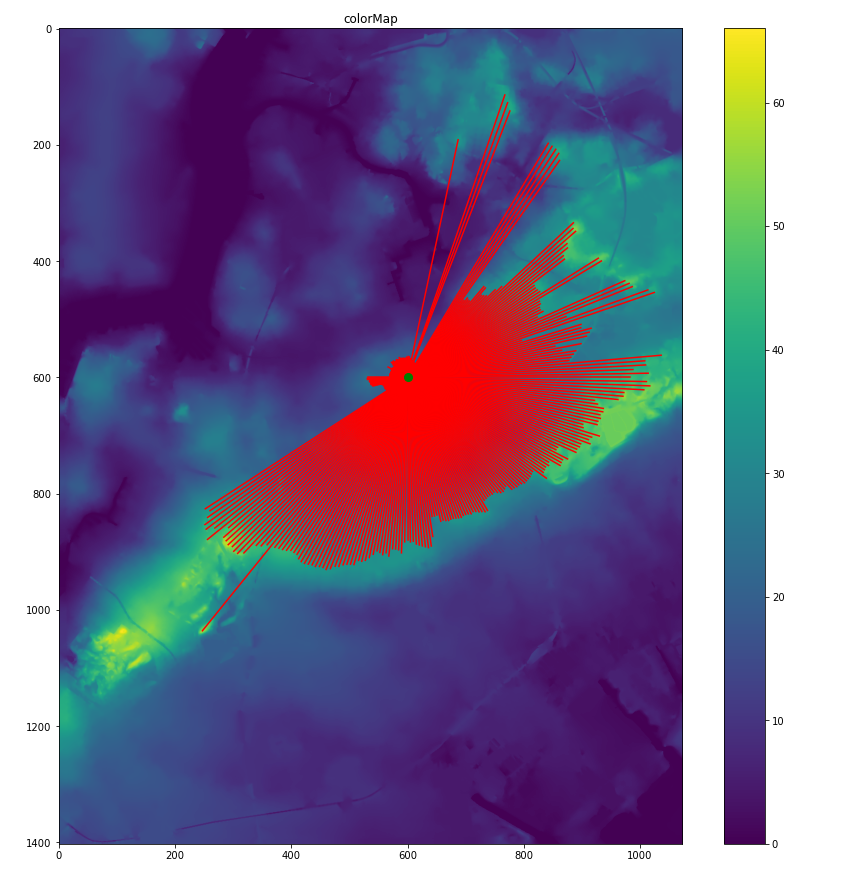

In [16]:
rows, cols = zip(*horizon_locations)

fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(dem2)
for i in range(len(cols)):
    rows2 = [start[0], rows[i]]
    cols2 = [start[1], cols[i]]
    plt.plot(cols2, rows2, 'r-')
    #plt.plot(start[1], start[0], 'ro') # NOTE: expects x,y not row,col so reverse them
    #plt.plot(cols,rows, 'rx-') # NOTE: expects x,y not row,col so reverse them

# start point in green
plt.plot([start[1]], [start[0]], 'go', markersize=8)

ax.set_aspect('equal')
cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical', ax=ax)
plt.show()

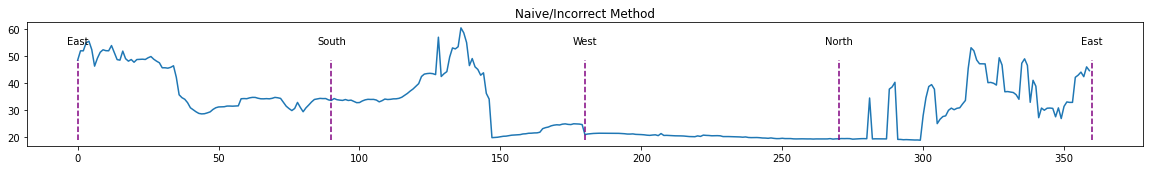

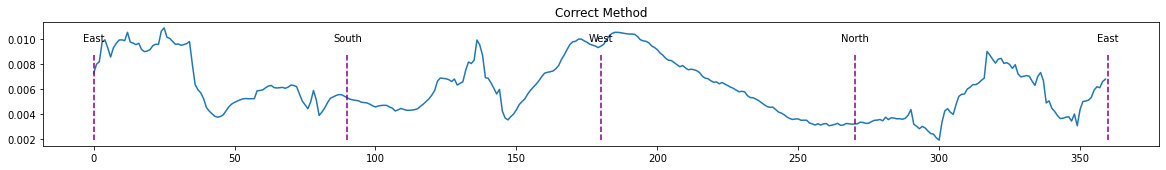

In [93]:
###########################
# GRAPH HORIZON
###########################
# NOTE: the lists right to left along the horizon (clockwise), but the graphs below are left to right (counterclockwise)
#       so we have to reverse the lists to view them as they would appear in an image. this means we reverse cardinals too:
cardinals = {0:"East", 90:"South", 180:"West", 270:"North", 360:"East"}

# NOTE: due to field of view (the farther away, the smaller elevation appears), using horizon_elevations is deceptive
h1 = horizon_elevations.copy()
h1.reverse()
fig1, ax1 = plt.subplots(figsize=(20,5))
plt.subplot(211)
plt.plot(h1)
#plt.ylim(0,100)
for key,value in cardinals.items():
    plt.vlines(x=key, ymin=min(h1), ymax=0.8*max(h1), colors='purple', label=value, linestyle='dashed')
    plt.annotate(text=value, xy=(key, 0.9*max(h1)), xytext=(key, 0.9*max(h1)), ha="center")
plt.title("Naive/Incorrect Method")
plt.show()

# so use horizon_thetas instead and use opp = tan()*adj with a set adjacent length
adj = 1 # this value doesn't matter if we are normalizing both our template and each subsection in the sliding window
h2 = [adj*np.tan(x) for x in horizon_thetas] # can remove multiplying by adj altogether bc of above comment
h2.reverse()
fig2, ax2 = plt.subplots(figsize=(20,5))
plt.subplot(212)
plt.plot(h2)
#plt.ylim(0,100)
for key,value in cardinals.items():
    plt.vlines(x=key, ymin=min(h2), ymax=0.8*max(h2), colors='purple', label=value, linestyle='dashed')
    plt.annotate(text=value, xy=(key, 0.9*max(h2)), xytext=(key, 0.9*max(h2)), ha="center")
plt.title("Correct Method")
plt.show()

In [94]:
# for encoded horizon template matching/LSH searches, compare derivative of elevations (encoded)
#      so you don't have to get the initial elevation correct
# or better yet, just normalize both the template we're looking for and each subsection of the sliding horizon window
# a challenge/unknown that still exists though is how wide to stretch/shrink the sliding window
#      bc we don't know how wide our template is!

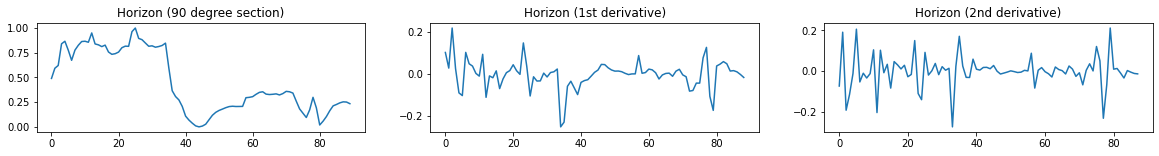

In [95]:
start_ind = 0
window_size = 90
h90 = h2[start_ind:window_size]

# normalize it
h90norm = (h90 - np.min(h90)) / (np.max(h90) - np.min(h90))

fig, ax = plt.subplots(figsize=(20,2))
plt.subplot(131)
plt.title("Horizon (90 degree section)")
plt.plot(h90norm)

plt.subplot(132)
plt.title("Horizon (1st derivative)")
dh1 = np.diff(h90norm)
plt.plot(dh1)

plt.subplot(133)
plt.title("Horizon (2nd derivative)")
dh2 = np.diff(dh1)
plt.plot(dh2)

plt.show()

In [96]:
# encode the horizon
henc = np.where(h90norm > 0.5, 1, 0)
print(henc)

# vs encode with random thresholds (via LSH method)
random.seed(123)
thresholds = [random.random() for i in range(90)]
henc2 = np.where(h90norm > thresholds, 1, 0)
print(henc2)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0]


In [102]:
# test encoding in all 360 degrees
window_size = 90
random.seed(123)
thresholds = [random.random() for i in range(90)]
#print(thresholds)
similarity_threshold = 0
similar_horizon_starting_points = []

for start_ind in range(360):
    # get values from horizon
    if start_ind+window_size > 360:
        h90 = h2[start_ind:]
        h90 += h2[:window_size-len(h90)]
    else:
        h90 = h2[start_ind:start_ind+window_size]

    # normalize it
    h90norm = (h90 - np.min(h90)) / (np.max(h90) - np.min(h90))

    # apply thresholds
    henc3 = np.where(h90norm > thresholds, 1, 0)

    # if difference is small enough between horizons, keep it
    if np.abs(sum(henc3)-sum(henc2)) <= similarity_threshold:
        similar_horizon_starting_points.append(start_ind)

print(similar_horizon_starting_points)

[]


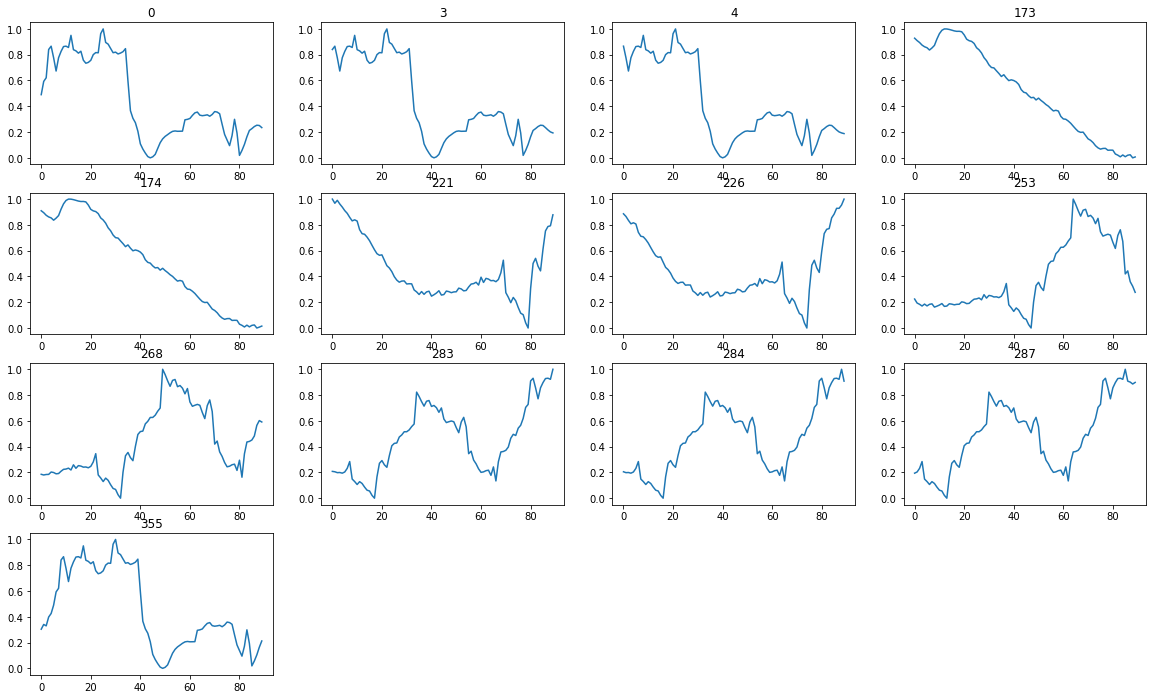

In [101]:
# show similar horizons
fig, ax = plt.subplots(figsize=(20,12))
ncols = 4
extrarow = 1 if len(similar_horizon_starting_points)%ncols > 0 else 0
nrows = len(similar_horizon_starting_points)//ncols + extrarow

for i,start_ind in enumerate(similar_horizon_starting_points):
    # get values from horizon
    if start_ind+window_size > 360:
        h90 = h2[start_ind:]
        h90 += h2[:window_size-len(h90)]
    else:
        h90 = h2[start_ind:start_ind+window_size]

    # normalize it
    h90norm = (h90 - np.min(h90)) / (np.max(h90) - np.min(h90))

    # plot it
    plt.subplot(nrows, ncols, i+1)
    plt.title(str(start_ind))
    plt.plot(h90norm)